2025-07-15 05:20:18.897561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752556819.279622      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752556819.384492      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



🚀 Combo 1 → Train:Test = 10:90


I0000 00:00:1752556838.801328      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752556838.802142      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


 Epoch 1/20, Loss: 4.2819
 Epoch 2/20, Loss: 4.2635
 Epoch 3/20, Loss: 4.2262
 Epoch 4/20, Loss: 4.2458
 Epoch 5/20, Loss: 4.2457
 Epoch 6/20, Loss: 4.1672
 Epoch 7/20, Loss: 4.1330
 Epoch 8/20, Loss: 4.2317
 Epoch 9/20, Loss: 4.1737
 Epoch 10/20, Loss: 4.1724
 Epoch 11/20, Loss: 4.1422
 Epoch 12/20, Loss: 4.1613
 Epoch 13/20, Loss: 4.1245
 Epoch 14/20, Loss: 4.1232
 Epoch 15/20, Loss: 4.1050
 Epoch 16/20, Loss: 4.0732
 Epoch 17/20, Loss: 4.0815
 Epoch 18/20, Loss: 4.1087
 Epoch 19/20, Loss: 4.1289
 Epoch 20/20, Loss: 4.1316


I0000 00:00:1752556875.165219     109 service.cc:148] XLA service 0x7957c0001f60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752556875.166528     109 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752556875.166551     109 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752556875.286918     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


135/806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

I0000 00:00:1752556875.545587     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


806/806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
7248/7248 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
✅ XGBoost Accuracy = 0.9062, F1 Class 0 = 0.8673, F1 Class 1 = 0.9275

🚀 Combo 2 → Train:Test = 20:80
 Epoch 1/20, Loss: 4.9200
 Epoch 2/20, Loss: 4.9075
 Epoch 3/20, Loss: 4.8640
 Epoch 4/20, Loss: 4.8501
 Epoch 5/20, Loss: 4.8331
 Epoch 6/20, Loss: 4.8390
 Epoch 7/20, Loss: 4.8344
 Epoch 8/20, Loss: 4.8195
 Epoch 9/20, Loss: 4.7881
 Epoch 10/20, Loss: 4.8103
 Epoch 11/20, Loss: 4.8073
 Epoch 12/20, Loss: 4.8274
 Epoch 13/20, Loss: 4.8209
 Epoch 14/20, Loss: 4.8250
 Epoch 15/20, Loss: 4.7874
 Epoch 16/20, Loss: 4.7853
 Epoch 17/20, Loss: 4.7732
 Epoch 18/20, Loss: 4.7747
 Epoch 19/20, Loss: 4.8234
 Epoch 20/20, Loss: 4.7815
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
✅ XGBoost Accuracy = 0.9107, F1 Class 0 = 0.8734, F1 Class 1 = 0.9311

🚀 Combo 3 → Train:Test = 30:70
 Epoch 1/20, Loss: 5.3315
 Epoch 2/20, Loss: 5.2952
 Epoch 3/20, Loss: 5.2499
 Epoch 4/20, Loss

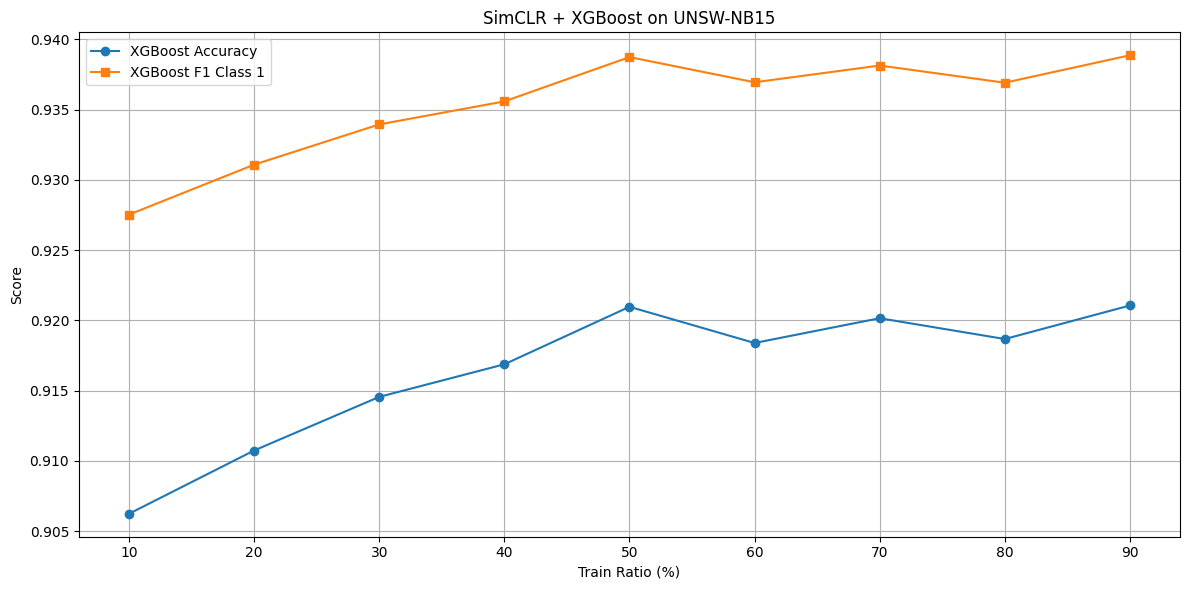

In [1]:
# ✅ SimCLR + XGBoost on UNSW-NB15
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load data
train = pd.read_parquet("/kaggle/input/unsw-nb15/UNSW_NB15_training-set.parquet")
test = pd.read_parquet("/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.parquet")
df = pd.concat([train, test])

# Preprocessing
df = df.drop(columns=['id', 'attack_cat'], errors='ignore')
for col in ['proto', 'service', 'state']:
    df[col] = pd.factorize(df[col])[0]
X = df.drop('label', axis=1)
y = df['label']
X = StandardScaler().fit_transform(X)

# SimCLR encoder
def build_encoder(input_dim):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(512, activation='relu')(inputs)
    x = layers.Dense(256, activation='relu')(x)
    return models.Model(inputs, x)

# Projection head
def build_projection_head(input_dim):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Dense(64)(x)
    return models.Model(inputs, x)

# Contrastive loss
def nt_xent_loss(z_i, z_j, temperature=0.5):
    z_i = tf.math.l2_normalize(z_i, axis=1)
    z_j = tf.math.l2_normalize(z_j, axis=1)
    representations = tf.concat([z_i, z_j], axis=0)
    similarity_matrix = tf.matmul(representations, representations, transpose_b=True)
    logits = similarity_matrix / temperature
    batch_size = tf.shape(z_i)[0]
    mask = tf.eye(2 * batch_size)
    logits = logits * (1 - mask) - 1e9 * mask
    labels = tf.concat([tf.range(batch_size, 2 * batch_size), tf.range(0, batch_size)], axis=0)
    loss = tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)
    return tf.reduce_mean(loss)

# Augmentation
def augment(X):
    noise = np.random.normal(0, 0.1, X.shape)
    mask = np.random.binomial(1, 0.85, X.shape)
    return X * mask + noise

# Train SimCLR
def train_simclr(X_train, epochs=20, batch_size=512):
    encoder = build_encoder(X_train.shape[1])
    projector = build_projection_head(encoder.output_shape[1])
    model_input = tf.keras.Input(shape=(X_train.shape[1],))
    features = encoder(model_input)
    projections = projector(features)
    simclr_model = tf.keras.Model(model_input, projections)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

    for epoch in range(epochs):
        idx = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[idx]
        for i in range(0, len(X_train), batch_size):
            batch = X_train_shuffled[i:i+batch_size]
            if batch.shape[0] < 2:
                continue
            x1 = augment(batch)
            x2 = augment(batch)
            with tf.GradientTape() as tape:
                z1 = simclr_model(x1, training=True)
                z2 = simclr_model(x2, training=True)
                loss = nt_xent_loss(z1, z2)
            grads = tape.gradient(loss, simclr_model.trainable_variables)
            optimizer.apply_gradients(zip(grads, simclr_model.trainable_variables))
        print(f" Epoch {epoch+1}/20, Loss: {loss.numpy():.4f}")
    return encoder

# Evaluate with XGBoost
def evaluate_with_xgboost(encoder, X_train, X_test, y_train, y_test):
    X_train_embedded = encoder.predict(X_train)
    X_test_embedded = encoder.predict(X_test)
    clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    clf.fit(X_train_embedded, y_train)
    y_pred = clf.predict(X_test_embedded)
    report = classification_report(y_test, y_pred, output_dict=True)
    return {
        'accuracy': report['accuracy'],
        'f1_class_0': report['0']['f1-score'],
        'f1_class_1': report['1']['f1-score']
    }

# Run on multiple train-test splits
ratios = [10, 20, 30,40, 50, 60, 70, 80, 90]
results_xgb = []

for idx, ratio in enumerate(ratios):
    print(f"\n🚀 Combo {idx + 1} → Train:Test = {ratio}:{100 - ratio}")
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=(100 - ratio) / 100, stratify=y, random_state=42)
    encoder = train_simclr(X_tr.astype(np.float32), epochs=20, batch_size=1024)
    metrics = evaluate_with_xgboost(encoder, X_tr, X_te, y_tr, y_te)
    metrics.update({'train_ratio': ratio})
    results_xgb.append(metrics)
    print(f"✅ XGBoost Accuracy = {metrics['accuracy']:.4f}, F1 Class 0 = {metrics['f1_class_0']:.4f}, F1 Class 1 = {metrics['f1_class_1']:.4f}")

# Save results
df_xgb = pd.DataFrame(results_xgb)
df_xgb.to_csv("simclr_xgboost_unsw_results.csv", index=False)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_xgb['train_ratio'], df_xgb['accuracy'], marker='o', label='XGBoost Accuracy')
plt.plot(df_xgb['train_ratio'], df_xgb['f1_class_1'], marker='s', label='XGBoost F1 Class 1')
plt.title('SimCLR + XGBoost on UNSW-NB15')
plt.xlabel('Train Ratio (%)')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()